In this notebook I will compare the VSH parameters obtained from different samples.

In [1]:
from astropy.table import Table, join, Column
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = "svg"

# 1. ICRF3 K vs. SX

In [2]:
vsh01k2xall = Table.read("../logs/icrf3_k_sx_vsh01_all.log", format="ascii")
vsh01k2xcln = Table.read("../logs/icrf3_k_sx_vsh01_cln.log", format="ascii")
vsh01k2xcom = Table.read("../logs/icrf3_k_sx_vsh01_com.log", format="ascii")
vsh01k2xccl = Table.read("../logs/icrf3_k_sx_vsh01_ccl.log", format="ascii")

vsh02k2xall = Table.read("../logs/icrf3_k_sx_vsh02_all.log", format="ascii")
vsh02k2xcln = Table.read("../logs/icrf3_k_sx_vsh02_cln.log", format="ascii")
vsh02k2xcom = Table.read("../logs/icrf3_k_sx_vsh02_com.log", format="ascii")
vsh02k2xccl = Table.read("../logs/icrf3_k_sx_vsh02_ccl.log", format="ascii")

In [3]:
names = ["$D_1$", "$D_2$", "$D_3$", "$R_1$", "$R_2$", "$R_3$"]

labels = ["All-01", "All-02", "Clean-01", "Clean-02",
          "Com-01", "Com-02", "ComCln-01", "ComCln-02"]

estimates = np.array([vsh01k2xall["Estimate"],
                      vsh02k2xall["Estimate"][:6],
                      vsh01k2xcln["Estimate"],
                      vsh02k2xcln["Estimate"][:6],
                      vsh01k2xcom["Estimate"],
                      vsh02k2xcom["Estimate"][:6],
                      vsh01k2xccl["Estimate"],
                      vsh02k2xccl["Estimate"][:6]])

errors = np.array([vsh01k2xall["Error"],
                   vsh02k2xall["Error"][:6],
                   vsh01k2xcln["Error"],
                   vsh02k2xcln["Error"][:6],
                   vsh01k2xcom["Error"],
                   vsh02k2xcom["Error"][:6],
                   vsh01k2xccl["Error"],
                   vsh02k2xccl["Error"][:6]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.2
loc = np.arange(num) * 2
locs = [loc + width * (i+1) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

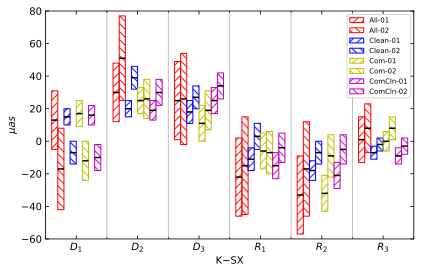

In [4]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[2*i], heights[2*i], fill=False,
           bottom=bottoms[2*i], edgecolor=colori,
           width=width, align="edge", label=labels[2*i], hatch="///")
    ax.bar(locs[2*i+1], heights[2*i+1], fill=False,
           bottom=bottoms[2*i+1], edgecolor=colori,
           width=width, align="edge", label=labels[2*i+1], hatch="\\\\\\")
    ax.hlines(estimates[2*i], locs[2*i], locs[2*i]+width)
    ax.hlines(estimates[2*i+1], locs[2*i+1], locs[2*i+1]+width)
    
ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.set_xlim([0, 12])
ax.set_ylim([-60, 80])

ax.set_xlabel("K$-$SX")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The first degree of VSH terms generally agrees with each other for different subset and also for different model (VSH01 and VSH02), except for $D_1$.

In [5]:
names = ["$E_{22}^R$", "$E_{22}^I$", "$E_{21}^R$", "$E_{21}^I$", "$E_{20}$",
         "$M_{22}^R$", "$M_{22}^I$", "$M_{21}^R$", "$M_{21}^I$", "$M_{20}$"]

labels = ["All-02", "Clean-02", "Com-02", "ComCln-02"]

estimates = np.array([vsh02k2xall["Estimate"][6:],
                      vsh02k2xcln["Estimate"][6:],
                      vsh02k2xcom["Estimate"][6:],
                      vsh02k2xccl["Estimate"][6:]])

errors = np.array([vsh02k2xall["Error"][6:],
                   vsh02k2xcln["Error"][6:],
                   vsh02k2xcom["Error"][6:],
                   vsh02k2xccl["Error"][6:]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.4
loc = np.arange(num) * 2
locs = [loc + width * (i+0.5) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

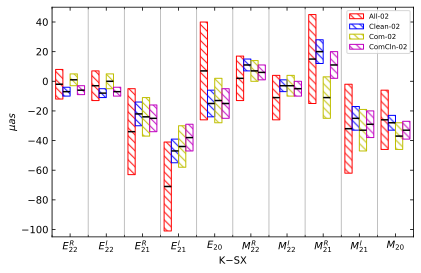

In [6]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width, align="edge", label=labels[i], hatch="\\\\\\")
    ax.hlines(estimates[i], locs[i], locs[i]+width)

ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.set_xlim([0, 20])
ax.set_ylim([-105, 50])

ax.set_xlabel("K$-$SX")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The quadrapolar terms generally agrees with each other, except for $M_R^{21}$.

I use four criteria to get a clean sample.

# 2 ICRF3 X/Ka vs. S/X

In [7]:
vsh01ka2xall = Table.read("../logs/icrf3_xka_sx_vsh01_all.log", format="ascii")
vsh01ka2xcln = Table.read("../logs/icrf3_xka_sx_vsh01_cln.log", format="ascii")
vsh01ka2xcom = Table.read("../logs/icrf3_xka_sx_vsh01_com.log", format="ascii")
vsh01ka2xccl = Table.read("../logs/icrf3_ka_sx_vsh01_ccl.log", format="ascii")

vsh02ka2xall = Table.read("../logs/icrf3_xka_sx_vsh02_all.log", format="ascii")
vsh02ka2xcln = Table.read("../logs/icrf3_xka_sx_vsh02_cln.log", format="ascii")
vsh02ka2xcom = Table.read("../logs/icrf3_xka_sx_vsh02_com.log", format="ascii")
vsh02ka2xccl = Table.read("../logs/icrf3_xka_sx_vsh02_ccl.log", format="ascii")

In [8]:
names = ["$D_1$", "$D_2$", "$D_3$", "$R_1$", "$R_2$", "$R_3$"]

labels = ["All-01", "All-02", "Clean-01", "Clean-02",
          "Com-01", "Com-02", "ComCln-01", "ComCln-02"]

estimates = np.array([vsh01ka2xall["Estimate"],
                      vsh02ka2xall["Estimate"][:6],
                      vsh01ka2xcln["Estimate"],
                      vsh02ka2xcln["Estimate"][:6],
                      vsh01ka2xcom["Estimate"],
                      vsh02ka2xcom["Estimate"][:6],
                      vsh01ka2xccl["Estimate"],
                      vsh02ka2xccl["Estimate"][:6]])

errors = np.array([vsh01ka2xall["Error"],
                   vsh02ka2xall["Error"][:6],
                   vsh01ka2xcln["Error"],
                   vsh02ka2xcln["Error"][:6],
                   vsh01ka2xcom["Error"],
                   vsh02ka2xcom["Error"][:6],
                   vsh01ka2xccl["Error"],
                   vsh02ka2xccl["Error"][:6]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.2
loc = np.arange(num) * 2
locs = [loc + width * (i+1) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

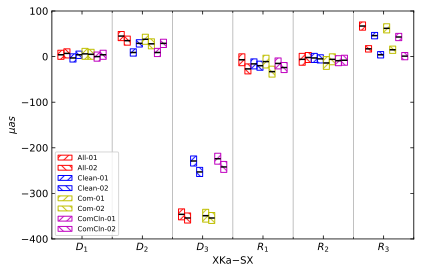

In [9]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[2*i], heights[2*i], fill=False,
           bottom=bottoms[2*i], edgecolor=colori,
           width=width, align="edge", label=labels[2*i], hatch="///")
    ax.bar(locs[2*i+1], heights[2*i+1], fill=False,
           bottom=bottoms[2*i+1], edgecolor=colori,
           width=width, align="edge", label=labels[2*i+1], hatch="\\\\\\")
    ax.hlines(estimates[2*i], locs[2*i], locs[2*i]+width)
    ax.hlines(estimates[2*i+1], locs[2*i+1], locs[2*i+1]+width)

ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.set_xlim([0, 12])
ax.set_ylim([-400, 100])

ax.set_xlabel("XKa$-$SX")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The difference in the solutions with and without removal of outliers is significant in $D_3$.

Differences in models (VSH01 and VSH02) affect the determination of $R_3$.

In [10]:
names = ["$E_{22}^R$", "$E_{22}^I$", "$E_{21}^R$", "$E_{21}^I$", "$E_{20}$",
         "$M_{22}^R$", "$M_{22}^I$", "$M_{21}^R$", "$M_{21}^I$", "$M_{20}$"]

labels = ["All-02", "Clean-02", "Com-02", "ComCln-02"]

estimates = np.array([vsh02ka2xall["Estimate"][6:],
                      vsh02ka2xcln["Estimate"][6:],
                      vsh02ka2xcom["Estimate"][6:],
                      vsh02ka2xccl["Estimate"][6:]])

errors = np.array([vsh02ka2xall["Error"][6:],
                   vsh02ka2xcln["Error"][6:],
                   vsh02ka2xcom["Error"][6:],
                   vsh02ka2xccl["Error"][6:]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.4
loc = np.arange(num) * 2
locs = [loc + width * (i+0.5) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

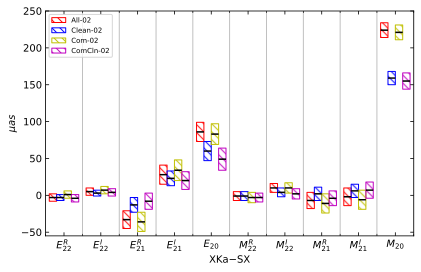

In [11]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width, align="edge", label=labels[i], hatch="\\\\\\")
    ax.hlines(estimates[i], locs[i], locs[i]+width)

ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.set_xlim([0, 20])
ax.set_ylim([-55, 250])

ax.set_xlabel("XKa$-$SX")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

Simialr to $D_3$, The difference in the solutions with and without removal of outliers is significant in $E^R_{21}$, $E_{20}$, and $M_{20}$.

# 3 Gaia-CRF2 vs. ICRF3 SX

In [12]:
vsh01g2xall = Table.read("../logs/gaia_icrf3_sx_vsh01_all.log", format="ascii")
vsh01g2xcln = Table.read("../logs/gaia_icrf3_sx_vsh01_cln.log", format="ascii")
vsh01g2xcom = Table.read("../logs/gaia_icrf3_sx_vsh01_com.log", format="ascii")
vsh01g2xccl = Table.read("../logs/icrf3_ka_sx_vsh01_ccl.log", format="ascii")

vsh02g2xall = Table.read("../logs/gaia_icrf3_sx_vsh02_all.log", format="ascii")
vsh02g2xcln = Table.read("../logs/gaia_icrf3_sx_vsh02_cln.log", format="ascii")
vsh02g2xcom = Table.read("../logs/gaia_icrf3_sx_vsh02_com.log", format="ascii")
vsh02g2xccl = Table.read("../logs/gaia_icrf3_sx_vsh02_ccl.log", format="ascii")

In [13]:
names = ["$D_1$", "$D_2$", "$D_3$", "$R_1$", "$R_2$", "$R_3$"]

labels = ["All-01", "All-02", "Clean-01", "Clean-02",
          "Com-01", "Com-02", "ComCln-01", "ComCln-02"]

estimates = np.array([vsh01g2xall["Estimate"],
                      vsh02g2xall["Estimate"][:6],
                      vsh01g2xcln["Estimate"],
                      vsh02g2xcln["Estimate"][:6],
                      vsh01g2xcom["Estimate"],
                      vsh02g2xcom["Estimate"][:6],
                      vsh01g2xccl["Estimate"],
                      vsh02g2xccl["Estimate"][:6]])

errors = np.array([vsh01g2xall["Error"],
                   vsh02g2xall["Error"][:6],
                   vsh01g2xcln["Error"],
                   vsh02g2xcln["Error"][:6],
                   vsh01g2xcom["Error"],
                   vsh02g2xcom["Error"][:6],
                   vsh01g2xccl["Error"],
                   vsh02g2xccl["Error"][:6]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.2
loc = np.arange(num) * 2
locs = [loc + width * (i+1) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

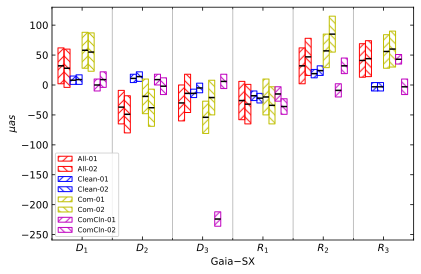

In [14]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[2*i], heights[2*i], fill=False,
           bottom=bottoms[2*i], edgecolor=colori,
           width=width, align="edge", label=labels[2*i], hatch="///")
    ax.bar(locs[2*i+1], heights[2*i+1], fill=False,
           bottom=bottoms[2*i+1], edgecolor=colori,
           width=width, align="edge", label=labels[2*i+1], hatch="\\\\\\")
    ax.hlines(estimates[2*i], locs[2*i], locs[2*i]+width)
    ax.hlines(estimates[2*i+1], locs[2*i+1], locs[2*i+1]+width)

ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.set_xlim([0, 12])
ax.set_ylim([-259, 130])

ax.set_xlabel("Gaia$-$SX")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The model difference affect the determination of $D_3$, $R_2$, and $R_3$ for the common clean sample.

It is better to use VSH02 fit rather than VSH01.

The differences in solutions with and without removal of outliers are significant.

In [15]:
names = ["$E_{22}^R$", "$E_{22}^I$", "$E_{21}^R$", "$E_{21}^I$", "$E_{20}$",
         "$M_{22}^R$", "$M_{22}^I$", "$M_{21}^R$", "$M_{21}^I$", "$M_{20}$"]

labels = ["All-02", "Clean-02", "Com-02", "ComCln-02"]

estimates = np.array([vsh02g2xall["Estimate"][6:],
                      vsh02g2xcln["Estimate"][6:],
                      vsh02g2xcom["Estimate"][6:],
                      vsh02g2xccl["Estimate"][6:]])

errors = np.array([vsh02g2xall["Error"][6:],
                   vsh02g2xcln["Error"][6:],
                   vsh02g2xcom["Error"][6:],
                   vsh02g2xccl["Error"][6:]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.4
loc = np.arange(num) * 2
locs = [loc + width * (i+0.5) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

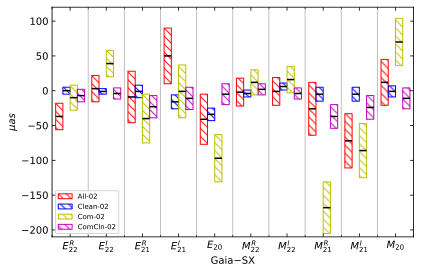

In [16]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width, align="edge", label=labels[i], hatch="\\\\\\")
    ax.hlines(estimates[i], locs[i], locs[i]+width)

ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.set_xlim([0, 20])
ax.set_ylim([-210, 120])

ax.set_xlabel("Gaia$-$SX")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

While the fittings based on the ``All``, ``Clean``, and ``Clean common`` samples agree well, except for $E^R_{22}$ and $E_{21}^I$, the fitting from ``Common`` sample stands alone.

As a result, this sample won't be used to derive the transformation parameters.

# 1. ICRF3 K vs. Gaia-CRF2

In [17]:
vsh01k2gall = Table.read("../logs/icrf3_k_gaia_vsh01_all.log", format="ascii")
vsh01k2gcln = Table.read("../logs/icrf3_k_gaia_vsh01_cln.log", format="ascii")
vsh01k2gcom = Table.read("../logs/icrf3_k_gaia_vsh01_com.log", format="ascii")
vsh01k2gccl = Table.read("../logs/icrf3_k_gaia_vsh01_ccl.log", format="ascii")

vsh02k2gall = Table.read("../logs/icrf3_k_gaia_vsh02_all.log", format="ascii")
vsh02k2gcln = Table.read("../logs/icrf3_k_gaia_vsh02_cln.log", format="ascii")
vsh02k2gcom = Table.read("../logs/icrf3_k_gaia_vsh02_com.log", format="ascii")
vsh02k2gccl = Table.read("../logs/icrf3_k_gaia_vsh02_ccl.log", format="ascii")

In [18]:
names = ["$D_1$", "$D_2$", "$D_3$", "$R_1$", "$R_2$", "$R_3$"]

labels = ["All-01", "All-02", "Clean-01", "Clean-02",
          "Com-01", "Com-02", "ComCln-01", "ComCln-02"]

estimates = np.array([vsh01k2gall["Estimate"],
                      vsh02k2gall["Estimate"][:6],
                      vsh01k2gcln["Estimate"],
                      vsh02k2gcln["Estimate"][:6],
                      vsh01k2gcom["Estimate"],
                      vsh02k2gcom["Estimate"][:6],
                      vsh01k2gccl["Estimate"],
                      vsh02k2gccl["Estimate"][:6]])

errors = np.array([vsh01k2gall["Error"],
                   vsh02k2gall["Error"][:6],
                   vsh01k2gcln["Error"],
                   vsh02k2gcln["Error"][:6],
                   vsh01k2gcom["Error"],
                   vsh02k2gcom["Error"][:6],
                   vsh01k2gccl["Error"],
                   vsh02k2gccl["Error"][:6]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.2
loc = np.arange(num) * 2
locs = [loc + width * (i+1) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

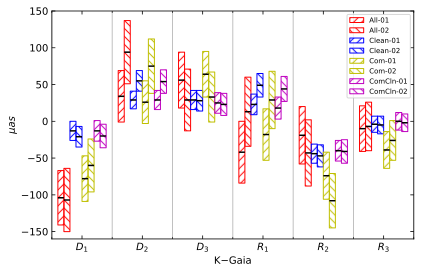

In [19]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[2*i], heights[2*i], fill=False,
           bottom=bottoms[2*i], edgecolor=colori,
           width=width, align="edge", label=labels[2*i], hatch="///")
    ax.bar(locs[2*i+1], heights[2*i+1], fill=False,
           bottom=bottoms[2*i+1], edgecolor=colori,
           width=width, align="edge", label=labels[2*i+1], hatch="\\\\\\")
    ax.hlines(estimates[2*i], locs[2*i], locs[2*i]+width)
    ax.hlines(estimates[2*i+1], locs[2*i+1], locs[2*i+1]+width)
    
ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.set_xlim([0, 12])
ax.set_ylim([-160, 150])

ax.set_xlabel("K$-$Gaia")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The first degree of VSH terms generally agrees with each other for different models (VSH01 and VSH02).

, except for $D_3$, $R_2$, and $R_3$.

The samples ``Clean`` and ``Clean common`` show almost the same result.

In [20]:
names = ["$E_{22}^R$", "$E_{22}^I$", "$E_{21}^R$", "$E_{21}^I$", "$E_{20}$",
         "$M_{22}^R$", "$M_{22}^I$", "$M_{21}^R$", "$M_{21}^I$", "$M_{20}$"]

labels = ["All-02", "Clean-02", "Com-02", "ComCln-02"]

estimates = np.array([vsh02k2gall["Estimate"][6:],
                      vsh02k2gcln["Estimate"][6:],
                      vsh02k2gcom["Estimate"][6:],
                      vsh02k2gccl["Estimate"][6:]])

errors = np.array([vsh02k2gall["Error"][6:],
                   vsh02k2gcln["Error"][6:],
                   vsh02k2gcom["Error"][6:],
                   vsh02k2gccl["Error"][6:]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.4
loc = np.arange(num) * 2
locs = [loc + width * (i+0.5) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

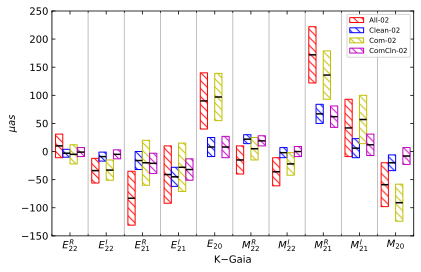

In [21]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width, align="edge", label=labels[i], hatch="\\\\\\")
    ax.hlines(estimates[i], locs[i], locs[i]+width)

ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.set_xlim([0, 20])
ax.set_ylim([-150, 250])

ax.set_xlabel("K$-$Gaia")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The parameters for $E_{20}$, $M_{21}^R$, and $M_{20}$ without outlier elimination differ significantly from those with outlier elimination.

# 5 ICRF3 X/Ka vs. Gaia

In [22]:
vsh01ka2gall = Table.read("../logs/icrf3_xka_gaia_vsh01_all.log", format="ascii")
vsh01ka2gcln = Table.read("../logs/icrf3_xka_gaia_vsh01_cln.log", format="ascii")
vsh01ka2gcom = Table.read("../logs/icrf3_xka_gaia_vsh01_com.log", format="ascii")
vsh01ka2gccl = Table.read("../logs/icrf3_xka_gaia_vsh01_ccl.log", format="ascii")

vsh02ka2gall = Table.read("../logs/icrf3_xka_gaia_vsh02_all.log", format="ascii")
vsh02ka2gcln = Table.read("../logs/icrf3_xka_gaia_vsh02_cln.log", format="ascii")
vsh02ka2gcom = Table.read("../logs/icrf3_xka_gaia_vsh02_com.log", format="ascii")
vsh02ka2gccl = Table.read("../logs/icrf3_xka_gaia_vsh02_ccl.log", format="ascii")

In [23]:
names = ["$D_1$", "$D_2$", "$D_3$", "$R_1$", "$R_2$", "$R_3$"]

labels = ["All-01", "All-02", "Clean-01", "Clean-02",
          "Com-01", "Com-02", "ComCln-01", "ComCln-02"]

estimates = np.array([vsh01ka2gall["Estimate"],
                      vsh02ka2gall["Estimate"][:6],
                      vsh01ka2gcln["Estimate"],
                      vsh02ka2gcln["Estimate"][:6],
                      vsh01ka2gcom["Estimate"],
                      vsh02ka2gcom["Estimate"][:6],
                      vsh01ka2gccl["Estimate"],
                      vsh02ka2gccl["Estimate"][:6]])

errors = np.array([vsh01ka2gall["Error"],
                   vsh02ka2gall["Error"][:6],
                   vsh01ka2gcln["Error"],
                   vsh02ka2gcln["Error"][:6],
                   vsh01ka2gcom["Error"],
                   vsh02ka2gcom["Error"][:6],
                   vsh01ka2gccl["Error"],
                   vsh02ka2gccl["Error"][:6]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.2
loc = np.arange(num) * 2
locs = [loc + width * (i+1) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

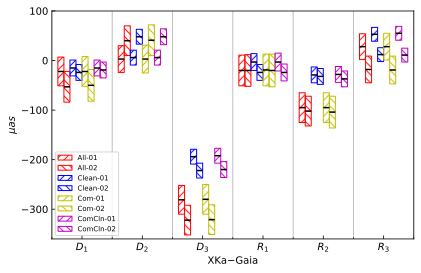

In [24]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[2*i], heights[2*i], fill=False,
           bottom=bottoms[2*i], edgecolor=colori,
           width=width, align="edge", label=labels[2*i], hatch="///")
    ax.bar(locs[2*i+1], heights[2*i+1], fill=False,
           bottom=bottoms[2*i+1], edgecolor=colori,
           width=width, align="edge", label=labels[2*i+1], hatch="\\\\\\")
    ax.hlines(estimates[2*i], locs[2*i], locs[2*i]+width)
    ax.hlines(estimates[2*i+1], locs[2*i+1], locs[2*i+1]+width)

ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.set_xlim([0, 12])
ax.set_ylim([-360, 100])

ax.set_xlabel("XKa$-$Gaia")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The difference in the solutions with and without removal of outliers is significant in $D_3$ and $R_2$.

In [25]:
names = ["$E_{22}^R$", "$E_{22}^I$", "$E_{21}^R$", "$E_{21}^I$", "$E_{20}$",
         "$M_{22}^R$", "$M_{22}^I$", "$M_{21}^R$", "$M_{21}^I$", "$M_{20}$"]

labels = ["All-02", "Clean-02", "Com-02", "ComCln-02"]

estimates = np.array([vsh02ka2gall["Estimate"][6:],
                      vsh02ka2gcln["Estimate"][6:],
                      vsh02ka2gcom["Estimate"][6:],
                      vsh02ka2gccl["Estimate"][6:]])

errors = np.array([vsh02ka2gall["Error"][6:],
                   vsh02ka2gcln["Error"][6:],
                   vsh02ka2gcom["Error"][6:],
                   vsh02ka2gccl["Error"][6:]])

heights = 2 * errors
bottoms = estimates - errors

num = len(names)
width = 0.4
loc = np.arange(num) * 2
locs = [loc + width * (i+0.5) for i in range(len(labels))]

colors = ["r", "b", "y", "m"]

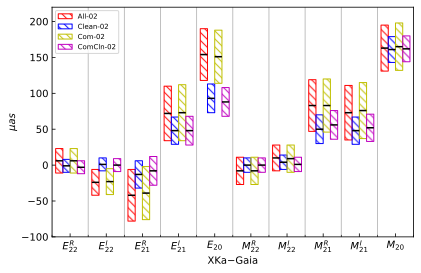

In [26]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width, align="edge", label=labels[i], hatch="\\\\\\")
    ax.hlines(estimates[i], locs[i], locs[i]+width)

ax.legend(fontsize="x-small")

ax.set_xticks(loc+1)
ax.set_xticklabels(names)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.set_xlim([0, 20])
ax.set_ylim([-100, 220])

ax.set_xlabel("XKa$-$Gaia")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

Simialr to $D_3$, The difference in the solutions with and without removal of outliers is significant in $E^R_{21}$.

In short, removal of outliers before least square fitting will make the terms like $D_3$ and $E_{20}$ less pronounced.

In [27]:
from my_progs.catalog.vsh_output import write_htable

vsh01_k = np.hstack((vsh02k2xccl["Estimate"][3:6], vsh02k2xccl["Estimate"][:3]))
vsh01_ka = np.hstack((vsh02ka2xccl["Estimate"][3:6], vsh02ka2xccl["Estimate"][:3]))
vsh01_g = np.hstack((vsh02g2xccl["Estimate"][3:6], vsh02g2xccl["Estimate"][:3]))
vsh01_k_err = np.hstack((vsh02k2xccl["Error"][3:6], vsh02k2xccl["Error"][:3]))
vsh01_ka_err = np.hstack((vsh02ka2xccl["Error"][3:6], vsh02ka2xccl["Error"][:3]))
vsh01_g_err = np.hstack((vsh02g2xccl["Error"][3:6], vsh02g2xccl["Error"][:3]))

write_htable(["K-X", "Ka-X", "Gaia-X"],
             [vsh01_k, vsh01_ka, vsh01_g], [vsh01_k_err, vsh01_ka_err, vsh01_g_err],
             fmt="%5.0f")

vsh02_k = vsh02k2xccl["Estimate"][6:]
vsh02_ka = vsh02ka2xccl["Estimate"][6:]
vsh02_g = vsh02g2xccl["Estimate"][6:]
vsh02_k_err = vsh02k2xccl["Error"][6:]
vsh02_ka_err = vsh02ka2xccl["Error"][6:]
vsh02_g_err = vsh02g2xccl["Error"][6:]

write_htable(["K-X", "Ka-X", "Gaia-X"],
             [vsh02_k, vsh02_ka, vsh02_g], [vsh02_k_err, vsh02_ka_err, vsh02_g_err],
             fmt="%5.0f")


  &$R1        $  &$R2        $  &$R3        $  &$D1        $  &$D2        $  &$D3        $ \\
\hline
K-X         &$   -4 \pm     9$  &$   -5 \pm     9$  &$   -3 \pm     5$  &$  -10 \pm     8$  &$   30 \pm     8$  &$   34 \pm     8$ \\
Ka-X        &$  -24 \pm    11$  &$   -8 \pm    11$  &$    1 \pm     8$  &$    4 \pm    10$  &$   29 \pm     9$  &$ -242 \pm    12$ \\
Gaia-X      &$  -36 \pm    13$  &$   32 \pm    13$  &$   -3 \pm    13$  &$    9 \pm    13$  &$   -2 \pm    14$  &$    6 \pm    12$ \\
  &$E22R      $  &$E22I      $  &$E21R      $  &$E21I      $  &$E20       $  &$M22R      $  &$M22I      $  &$M21R      $  &$M21I      $  &$M20       $ \\
\hline
K-X         &$   -6 \pm     3$  &$   -7 \pm     3$  &$  -25 \pm     9$  &$  -38 \pm     9$  &$  -15 \pm    10$  &$    6 \pm     5$  &$   -5 \pm     5$  &$   11 \pm     9$  &$  -29 \pm     9$  &$  -33 \pm     6$ \\
Ka-X        &$   -4 \pm     5$  &$    4 \pm     5$  &$   -8 \pm    11$  &$   20 \pm    12$  &$   49 \pm    15$  &$   -3 \p